In [2]:
# Task 3: Customer Segmentation using K-Means Clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [3]:
# -------------------- Step 1: Load Dataset --------------------
# Working public dataset URL (UCI mirror)
url = "Mall_Customers.csv"
df = pd.read_csv(url)

print("Sample Data:\n", df.head())


Sample Data:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# -------------------- Step 2: Preprocessing --------------------
# Drop 'CustomerID'
df = df.drop('CustomerID', axis=1)
# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

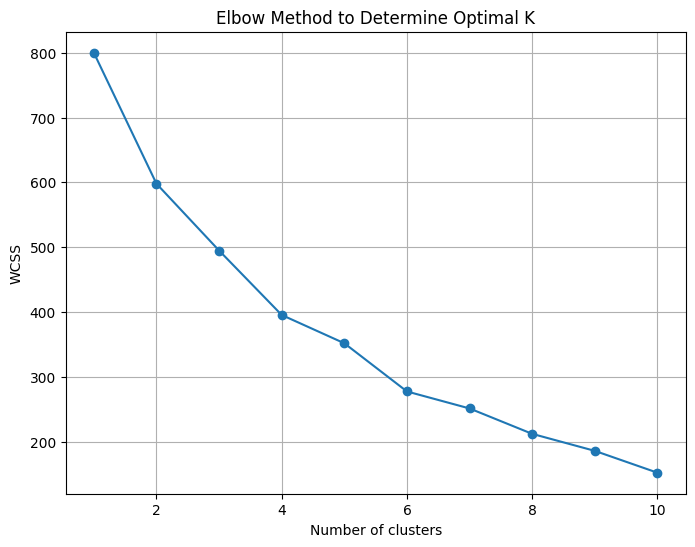

In [5]:
# -------------------- Step 3: Elbow Method --------------------
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_features)
    wcss.append(km.inertia_)
    # Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [6]:
# -------------------- Step 4: Apply K-Means --------------------
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster label
df['Cluster'] = clusters

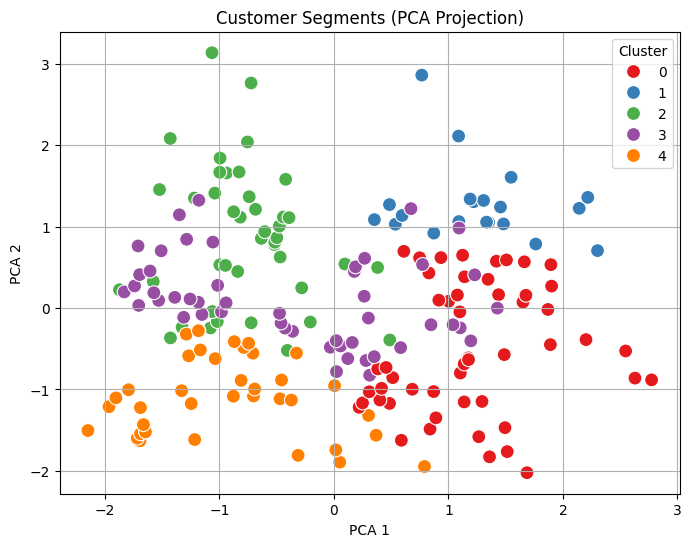

In [7]:
# -------------------- Step 5: PCA Visualization --------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.title("Customer Segments (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()